In [1]:
import numpy as np
import pandas as pd
from PIL import Image

In [2]:
df_can = pd.read_excel("Canada.xlsx",
                       sheet_name="Canada by Citizenship",
                       skiprows=range(20),
                       skipfooter=2)
print("Data downloaded and read into a dataframe!")

Data downloaded and read into a dataframe!


In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3774,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_can.drop(["AREA", "REG","DEV","Type","Coverage","Unnamed: 43","Unnamed: 44","Unnamed: 45","Unnamed: 46","Unnamed: 47","Unnamed: 48","Unnamed: 49","Unnamed: 50"],axis=1,inplace=True)
df_can.rename(columns={"OdName":"Country", "AreaName":"Continent","RegName":"Region"}, inplace=True)
df_can.columns = list(map(str,df_can.columns))
df_can.set_index("Country", inplace = True)
df_can["Total"] = df_can.sum(axis=1)
years = list(map(str,range(1980,2014)))
print("data dimensions:", df_can.shape)

data dimensions: (195, 38)


Visualizing Data Using Matplotlib

In [5]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
mpl.style.use("ggplot")
print("Matplotlib version:", mpl.__version__)


Matplotlib version: 3.3.4


In [6]:
df_dsn = df_can.loc[["Denmark", "Norway","Sweden"],:]
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [7]:
total_values = sum(df_dsn["Total"])
category_proportions = [(float(value)/total_values) for value in df_dsn["Total"]]

for i, proportion in enumerate(category_proportions):
    print (df_dsn.index.values[i] + ": " + str(proportion))

Denmark: 0.32255663965602777
Norway: 0.1924094592359848
Sweden: 0.48503390110798744


In [8]:
width = 40
height = 10
total_num_tiles = width*height
print("Total number of tiles is ", total_num_tiles)

Total number of tiles is  400


In [9]:
tiles_per_category = [round(proportion*total_num_tiles) for proportion in category_proportions]
for i, tiles in enumerate(tiles_per_category):
    print(df_dsn.index.values[i] + ": " + str(tiles))

Denmark: 129
Norway: 77
Sweden: 194


In [10]:
waffle_chart = np.zeros((height, width))

category_index = 0
tile_index = 0

for col in range(width):
    for row in range(height):
        tile_index += 1
        
        if tile_index>sum(tiles_per_category[0:category_index]):
            category_index += 1
            
        waffle_chart[row,col]=category_index
        
print("Waffle chart populated!")

Waffle chart populated!


In [11]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

<Figure size 432x288 with 0 Axes>

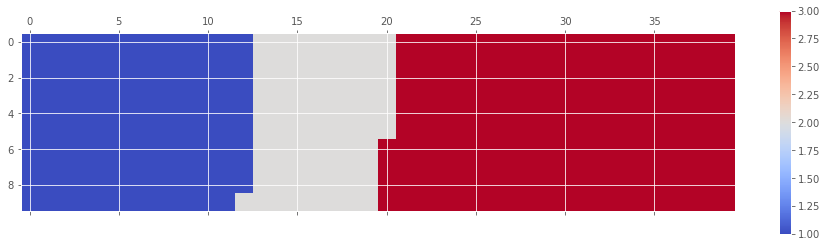

In [12]:
fig=plt.figure()

colormap=plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

([], [])

<Figure size 432x288 with 0 Axes>

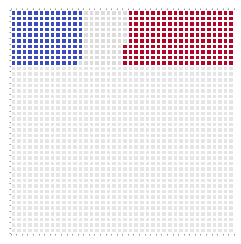

In [13]:
fig = plt.figure()
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar

ax=plt.gca()

ax.set_xticks(np.arange(-.5,(width),1),minor=True)
ax.set_yticks(np.arange(-.5,(width),1),minor=True)

ax.grid(which="minor", color="w", linestyle="-", linewidth=2)

plt.xticks([])
plt.yticks([])

<Figure size 432x288 with 0 Axes>

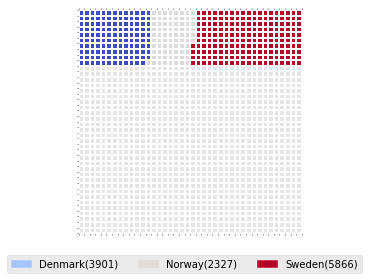

In [14]:
fig = plt.figure()
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar

ax=plt.gca()

ax.set_xticks(np.arange(-.5,(width),1),minor=True)
ax.set_yticks(np.arange(-.5,(width),1),minor=True)

ax.grid(which="minor", color="w", linestyle="-", linewidth=2)

plt.xticks([])
plt.yticks([])

values_cumsum = np.cumsum(df_dsn["Total"])
total_values = values_cumsum[len(values_cumsum)-1]

legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + "(" + str(df_dsn["Total"][i]) + ")"
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))
    
plt.legend(handles=legend_handles,
          loc="lower center",
          ncol=len(df_dsn.index.values),
          bbox_to_anchor=(0.,-0.2,0.95, .1)
          )

In [19]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):
    total_values = sum(values)
    category_proportions = [(float(value)/total_values) for value in values]
    
    total_num_tiles = width *height
    print('Total number of tiles is', total_num_tiles)
    
    tiles_per_category = [round(proportion*total_num_tiles) for proportion in category_proportions]
    
    for i, tiles in enumerate(tiles_per_category):
        print(df_dsn.index.values[i]+': ' + str(tiles))
        
    waffle_chart = np.zeros((height, width))
    
    category_index = 0
    tile_index = 0
    
    for col in range(width):
        for row in range(height):
            tile_index +=1
            
            if tile_index>sum(tiles_per_category[0:category_index]):
                category_index+=1
                
            waffle_chart[row,col] = category_index
            
    fig=plt.figure()
    
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart,cmap=colormap)
    plt.colorbar()
    
    ax = plt.gca()
    ax.set_xticks(np.arange(-.5,(width),1),minor=True)
    ax.set_yticks(np.arange(-.5,(height),1),minor=True)
    
    ax.grid(which='minor', color='w',linestyle='-', linewidth=2)
    
    plt.xticks([])
    plt.yticks([])
    
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum)-1]
    
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign=='%':
            label_str = category+' ('+str(values[i])+value_sign+')'
        else:
            label_str=category + '('+value_sign+str(values[i])+')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val,label=label_str))
        
    plt.legend(handles=legend_handles,
              loc='lower center',
              ncol=len(categories),
              bbox_to_anchor=(0.,-0.2,0.95,.1))
    

In [20]:
width = 40
height = 10

categories = df_dsn.index.values
values = df_dsn['Total']

colormap = plt.cm.coolwarm

Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


<Figure size 432x288 with 0 Axes>

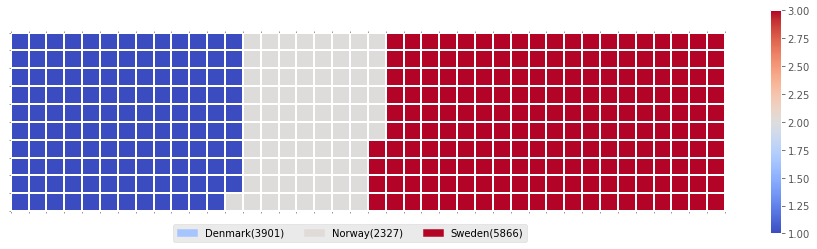

In [21]:
create_waffle_chart(categories,values,height,width,colormap)

In [22]:
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS

print('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [27]:
!wget --quiet https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt -O alice_novel.txt
    
alice_novel = open('alice_novel.txt', 'r').read()


print('File downloaded and saved!')

File downloaded and saved!


      1 [main] wget 22696 find_fast_cwd: WARNING: Couldn't compute FAST_CWD pointer.  Please report this problem to
the public mailing list cygwin@cygwin.com


In [28]:
stopwords =set(STOPWORDS)

In [32]:
alice_wc= WordCloud(background_color='white',
                   max_words=2000,
                   stopwords=stopwords)

alice_wc.generate(alice_novel)

ValueError: We need at least 1 word to plot a word cloud, got 0.

ValueError: WordCloud has not been calculated, call generate first.

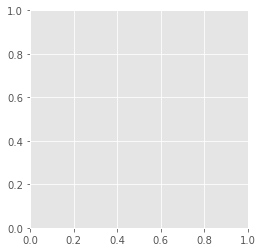

In [31]:
plt.imshow(alice_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

ValueError: WordCloud has not been calculated, call generate first.

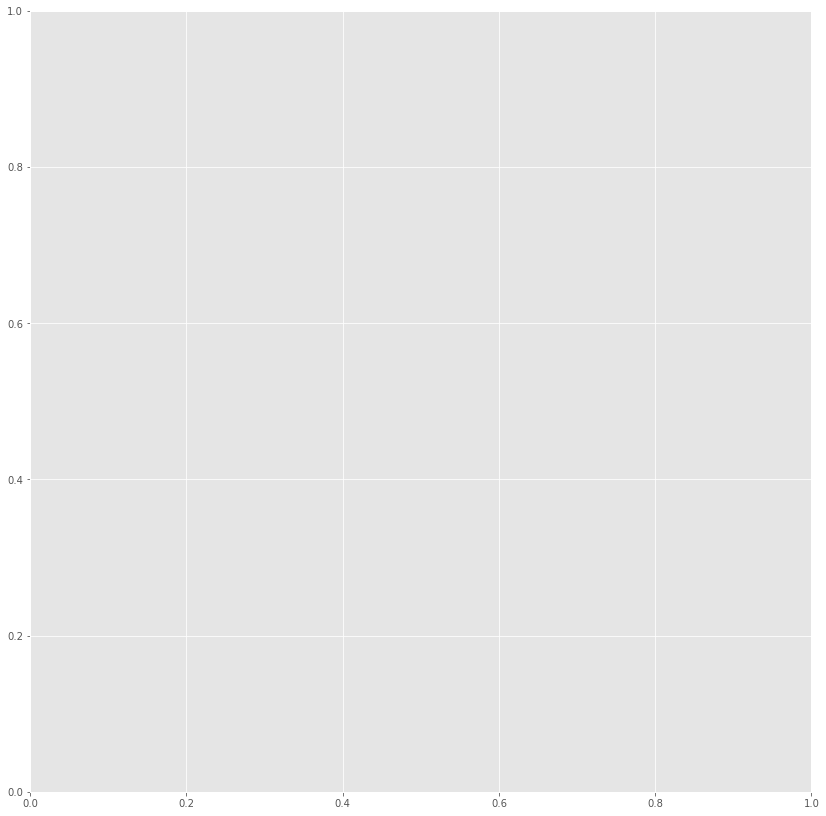

In [41]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [42]:
stopwords.add('said')

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [39]:
!wget --quiet https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_mask.png -O alice_mask.png

      0 [main] wget 15060 find_fast_cwd: WARNING: Couldn't compute FAST_CWD pointer.  Please report this problem to
the public mailing list cygwin@cygwin.com


In [40]:
alice_mask = np.array(Image.open('alice_mask.png'))
print('Image downloaded and saved!')

UnidentifiedImageError: cannot identify image file 'alice_mask.png'

In [43]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_mask,cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

NameError: name 'alice_mask' is not defined

<Figure size 1008x1296 with 0 Axes>

In [44]:
alice_wc = WordCloud(background_color='white',max_words=2000, mask=alice_mask,stopwords=stopwords)

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

NameError: name 'alice_mask' is not defined

In [45]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [46]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153

In [47]:
max_words = 90
word_string = ''
for country in df_can.index.values:
    if len(country.split(' '))==1:
        repeat_num_times = int(df_can.loc[country,'Total']/float(total_immigration)*max_words)
        word_string=word_string+((country+' ')*repeat_num_times)
        
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [49]:
wordcloud = WordCloud(background_color='white').generate(word_string)
print('Word Cloud created!')

TypeError: expected string or bytes-like object

ValueError: WordCloud has not been calculated, call generate first.

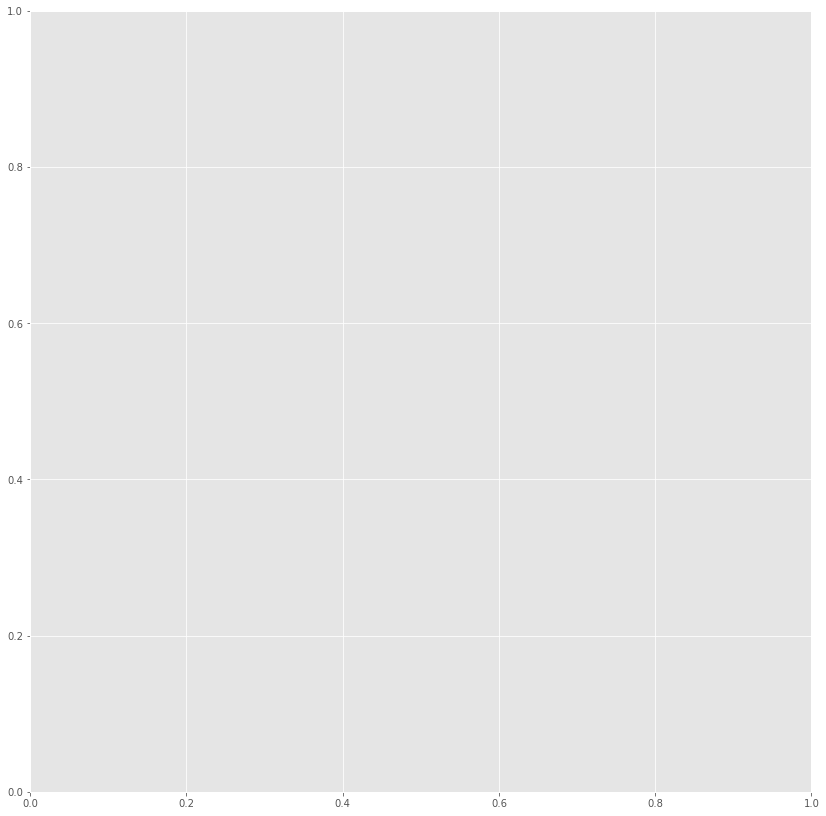

In [50]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [51]:
!pip install seaborn

import seaborn as sns
print('Seaborn installed and imported!')

Seaborn installed and imported!


In [53]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))
df_tot.index = map(float,df_tot.index)
df_tot.reset_index(inplace=True)

df_tot.columns = ['year','total']
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


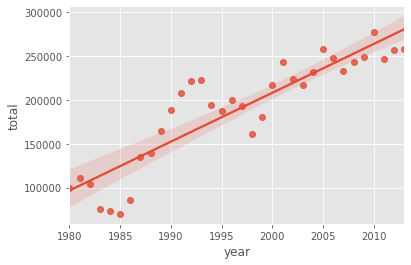

In [54]:
import seaborn as sns
ax = sns.regplot(x='year',y='total',data=df_tot)

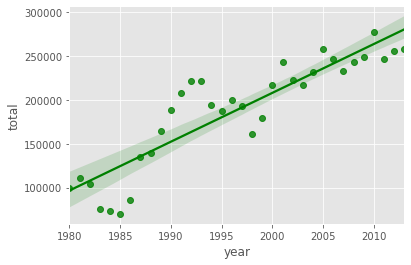

In [55]:
ax = sns.regplot(x='year',y='total',data=df_tot, color='green')

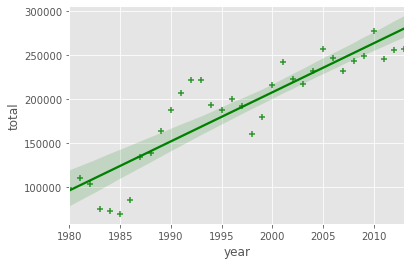

In [56]:
ax = sns.regplot(x='year',y='total',data=df_tot, color='green',marker='+')

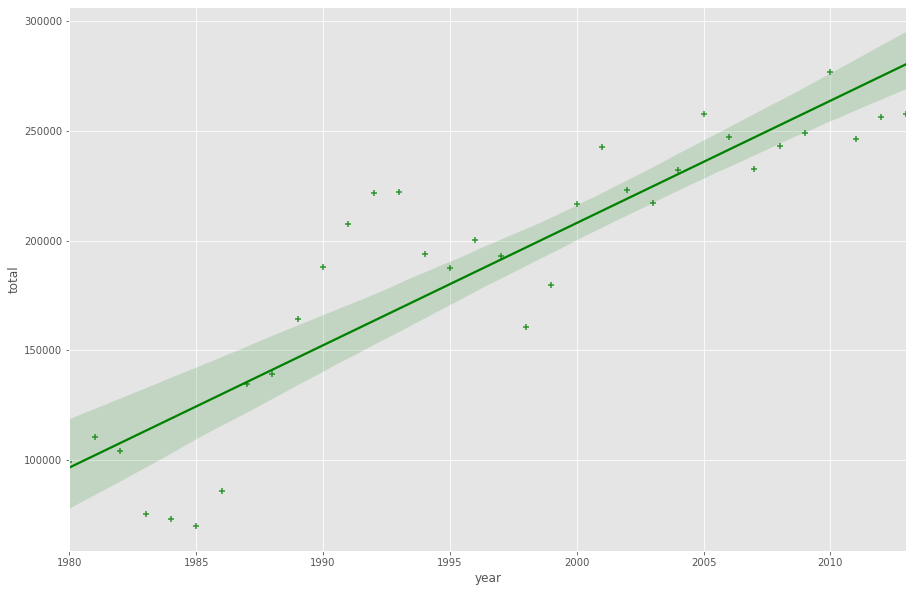

In [57]:
plt.figure(figsize=(15,10))
ax = sns.regplot(x='year',y='total',data=df_tot, color='green', marker='+')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980-2013')

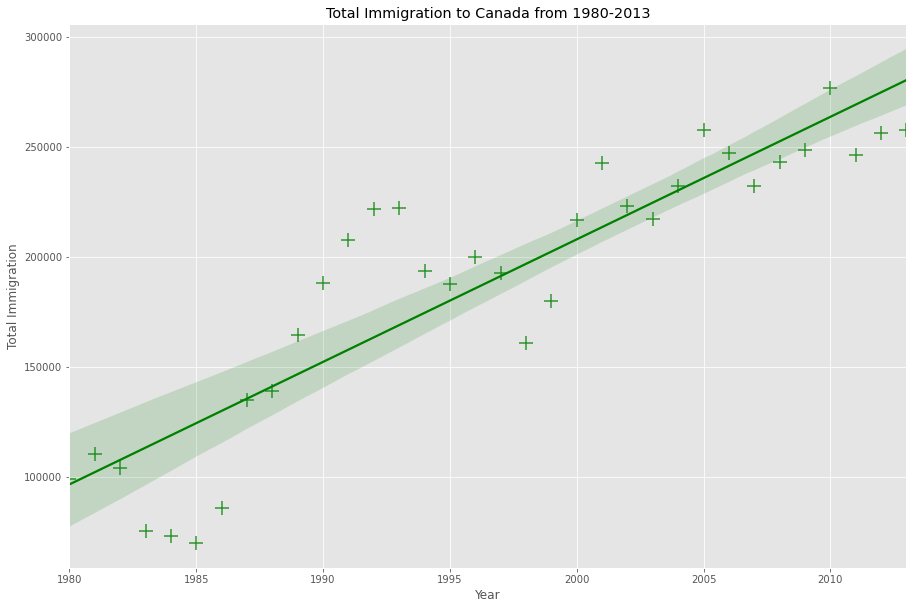

In [58]:
plt.figure(figsize=(15,10))
ax = sns.regplot(x='year',y='total',data=df_tot, color='green', marker='+',scatter_kws={'s':200})

ax.set(xlabel='Year',ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980-2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980-2013')

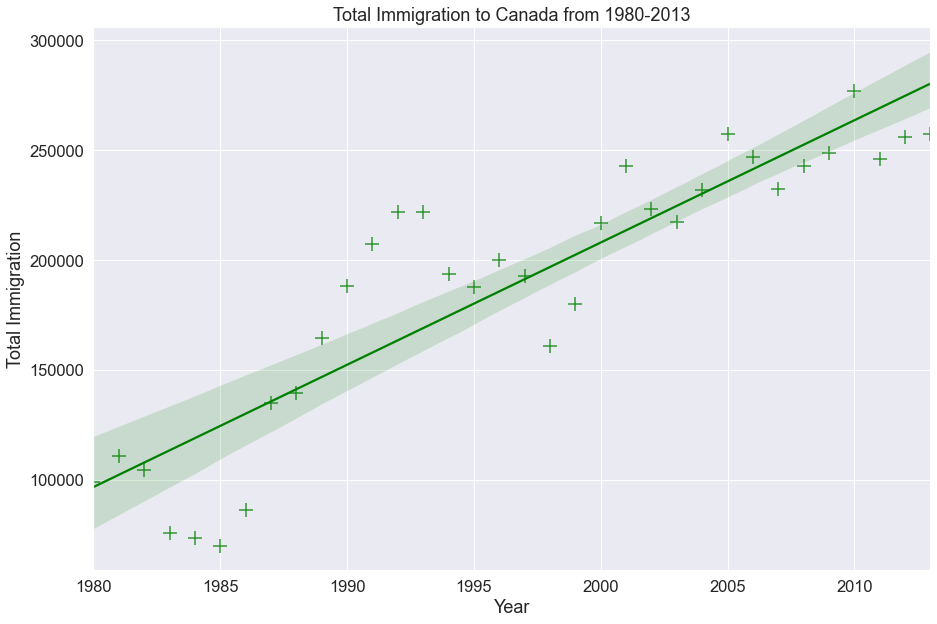

In [59]:
plt.figure(figsize=(15,10))

sns.set(font_scale=1.5)
ax = sns.regplot(x='year',y='total',data=df_tot, color='green', marker='+',scatter_kws={'s':200})

ax.set(xlabel='Year',ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980-2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980-2013')

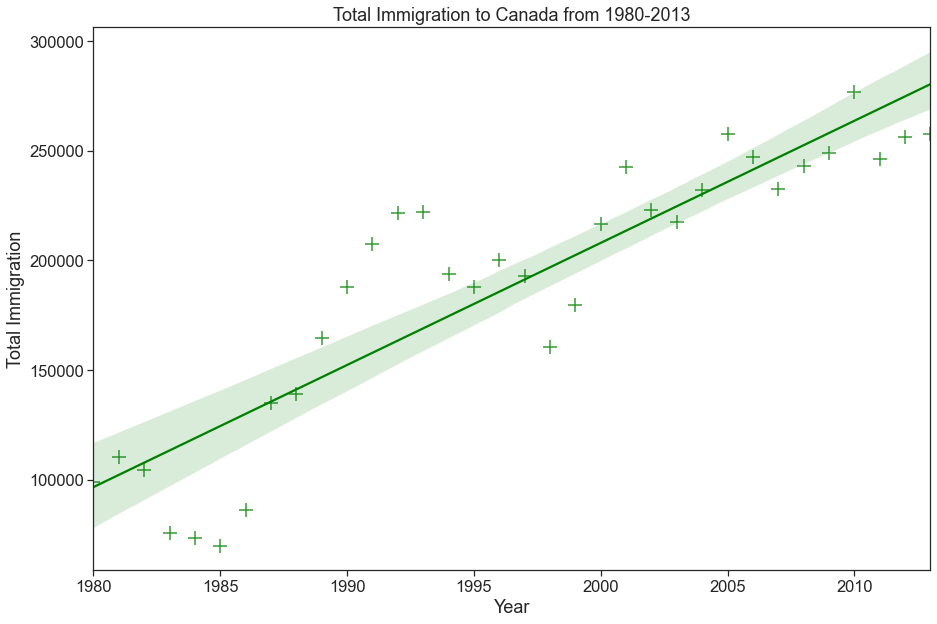

In [60]:
plt.figure(figsize=(15,10))

sns.set(font_scale=1.5)
sns.set_style('ticks')
ax = sns.regplot(x='year',y='total',data=df_tot, color='green', marker='+',scatter_kws={'s':200})

ax.set(xlabel='Year',ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980-2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980-2013')

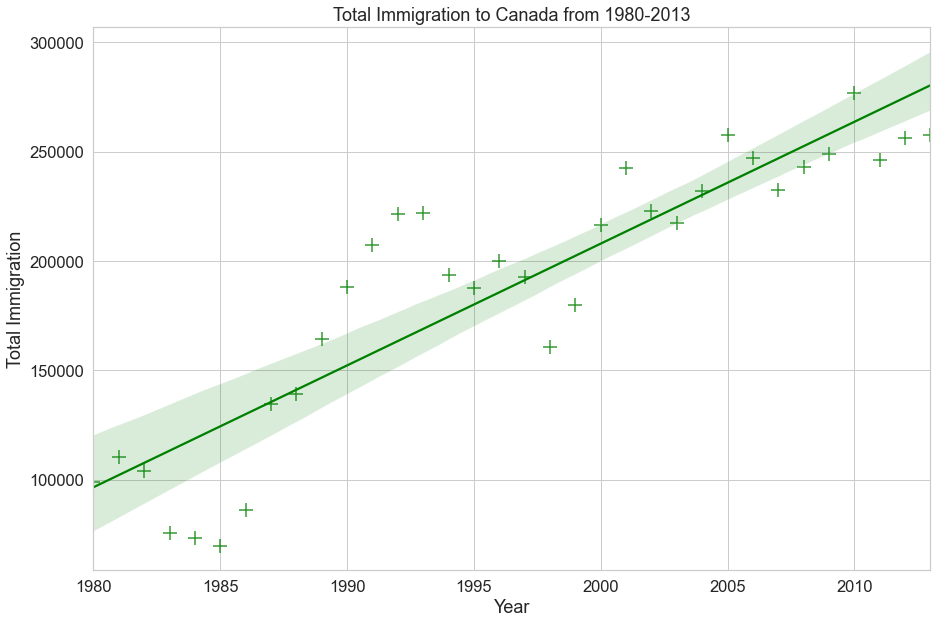

In [61]:
plt.figure(figsize=(15,10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')
ax = sns.regplot(x='year',y='total',data=df_tot, color='green', marker='+',scatter_kws={'s':200})

ax.set(xlabel='Year',ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980-2013')

Text(0.5, 1.0, 'Total Immigration from Denmark, Sweden, and Norway to Canada from 1980-2013')

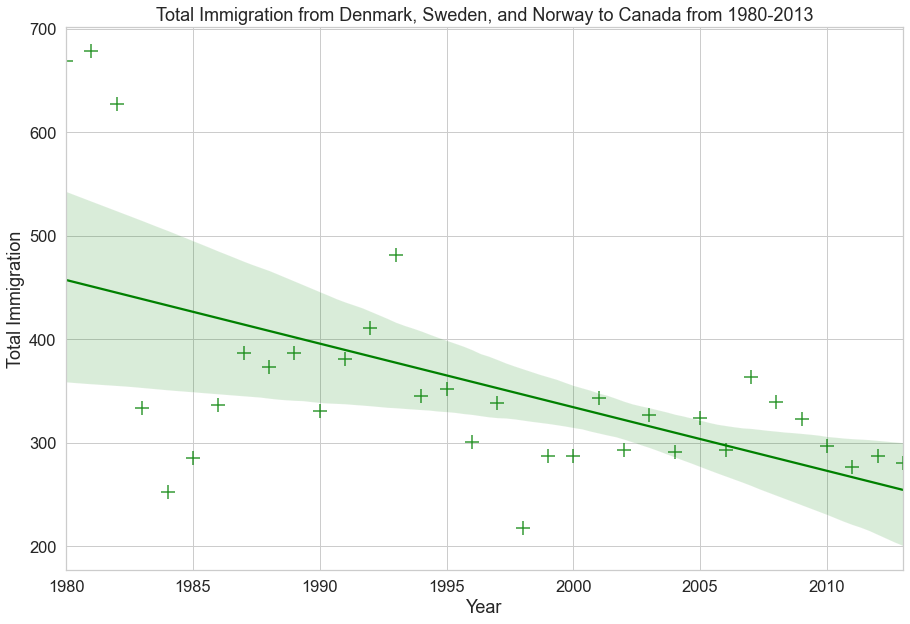

In [62]:
df_countries = df_can.loc[['Denmark','Norway','Sweden'],years].transpose()

df_total = pd.DataFrame(df_countries.sum(axis=1))
df_total.reset_index(inplace=True)
df_total.columns=['year','total']
df_total['year']=df_total['year'].astype(int)

plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year',y='total',data=df_total,color='green',marker='+',scatter_kws={'s':200})
ax.set(xlabel='Year',ylabel='Total Immigration')
ax.set_title('Total Immigration from Denmark, Sweden, and Norway to Canada from 1980-2013')
